<a href="https://colab.research.google.com/github/Phubordin/portfolio-project/blob/main/Project_3_Customer_Segmentation_and_RFM_Analysis_Using_Python_and_R_for_Strategic_Business_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("sample-store.csv") # import data เข้าตัวแปร

display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,1/21/2017,1/23/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **Explore Data**

In [ ]:
df.shape # (9994, 21 ex.header) ดูขนาด row * column ไม่รวมหัวตาราง
df.info() # เช็คว่าหน้าตาของ data มีคอลัมน์อะไรบ้าง ประเภทข้อมูลเป็นยังไง กี่แถว กี่คอลัมน์

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

## **Explore Date**

In [ ]:
# Order Date และ Ship Data เป็น object
df[["Order Date", "Ship Date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Order Date  9994 non-null   object
 1   Ship Date   9994 non-null   object
dtypes: object(2)
memory usage: 156.3+ KB


## **Explore NaN**

2 Ways to Explore NaN Values

### ALL Rows Specific NaN Columns.

In [ ]:
df.loc[:, df.isna().any()
  ].sort_values("Postal Code") # ดึงทุกแถว เฉพาะคอลัมน์ที่มี NaN


,Postal Code
2415,1040.0
2028,1453.0
2029,1453.0
5768,1453.0
2031,1453.0
...,...
9386,NaN
9387,NaN
9388,NaN
9389,NaN


### ALL Columns Specific NaN Rows


In [ ]:
df[df.isna().any(axis=1)] # ดึงทุกคอลัมน์ เฉพาะแถวที่มี NaN


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,12/5/2020,12/10/2020,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,11/7/2018,11/9/2018,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,4/6/2019,4/10/2019,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


#### **Postal Code Contain NaN**

In [ ]:
df[df.isna().any(axis=1)][["Customer Name", "Postal Code"]]["Customer Name"].unique().reshape(-1, 1) # ชื่อลูกค้าที่ไม่มี Postal Code

df[df["Customer Name"]
   .isin(['Quincy Jones', 'Stewart Visinsky', 'Valerie Mitchum', 'Claudia Bergmann', 'Raymond Messe'])
   ][
       ["Customer Name", "Order ID", "State", "City", "Postal Code", "Product Name"]
       ].sort_values(["Customer Name", "Postal Code"]
                     ).reset_index(drop=True) # สำรวจดููกค้า 5 คนที่ไม่มี Postal Code เค้าเค้าสั่งซื้อสินค้า บิลไหน และส่งไปที่ไหนบ้าง เพื่อที่จะดูว่าเค้าสั่งไปส่งที่ไหน เพื่อเพิ่มโอกาสที่ Exploration Postal Code ที่หายไป

# สังเกตว่าลูกค้า 5 คน สั่งของลงไปที่อยู่แตกต่างกันหมดเลย แต่สังเกตได้ว่ามีแค่ Postal Code ที่อยู่ในเมือง Burlington เท่านั้นที่เกิด NaN ขึ้น ดังนั้น กรอง Burlington และดู Postal Code
# กรองแค่ชื่อเมือง Burlington และ Postal Code

df[df["City"] == "Burlington"][["City", "Postal Code"]].sort_values("Postal Code") # กรองเฉพาะเมือง Burlington เลือกมาแค่ City, Postal Code เรียงตัวอักษร A-Z Postal Code

# เราจะลองใช้ mode ในการคำนวณ แต่ Average, median ใช้ไม่ได้เพราะ Postal มันวิธีเคราะห์ได้แค่เชิงคุณภาพเท่านั้น
# แต่ เอ้ะ ! เดี๋ยวก่อน เราต้องสำรวจข้อมูลให้ครบก่อนว่าทำไมถึงมี เมือง Burlington ที่มี Postal ล่ะ? ลูกค้าเป็นใคร transaction เป็นแบบไหน?

df[df["City"] == "Burlington"][
    ["Customer Name", "Order ID", "State", "City", "Postal Code", "Product Name"]
    ].sort_values("Postal Code").reset_index(drop=True)

# เอ้ะ ! มันมีเมืองเดียวกัน แต่อยู่คนละรัฐได้ด้วยหรอ? ผลปรากฎว่าใช่ครับเป็นเรื่องปกติของอเมริกา ที่มีตัวอักษรชื่อเมืองเหมือนกัน แต่อยู่รัฐที่แตกต่างกัน
# เหมือนอำเภอนึงบ้านเราเป็นอำเภอพิเศษ คือ
# อธิบายหลักฐาน
# สรุปการสำรวจทั้ง 2 ข้อ
# สรุปผล เบื้องต้นสำหรับการสำรวจข้อมูล (สำหรับข้อ NaN บอกวิธีที่ดีที่สุดสำหรับการแก้ไข NaN)
# หลังจากนั้นเริ่ม prepare


array([['Quincy Jones'],
       ['Stewart Visinsky'],
       ['Valerie Mitchum'],
       ['Claudia Bergmann'],
       ['Raymond Messe']], dtype=object)

# **Data Wrangling**

3 ข้อที่ต้องจัดการกับข้อมูลชุดนี้

1. Prepare NaN
2. Trim
3. Convert Date




## **Prepare NaN**

In [ ]:
# Drop NaN Column เพราะไม่ได้ใช้ เราจะต้องไม่มี NaN ในการวิเคราะห์ Data
# ควรแก้ต้นทางหาก NaN

df = df.drop("Postal Code", axis = 1)


## **TRIM**

In [ ]:
# Trim
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


<ipython-input-8-a1c6b7d4b9aa>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


## **Convert Date**

In [ ]:
# จากก่อนหน้าทำไมต้อง convert date
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format = "%m/%d/%Y") # format convert to be ISO Time
df["Order Date"] = pd.to_datetime(df["Order Date"], format = "%m/%d/%Y") # format convert to be ISO Time


## **Tidy Data**

In [ ]:
display(df) # ข้อมูลที่สะอาด (แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **RFM Analysis Using Python**


## **Import Library**

In [ ]:
import pandas as pd # ใช้จัดการข้อมูล DataFrame / ตารางข้อมูล | import, export ไฟล์ merge ตาราง
import numpy as np # พื้นฐานของการคำนวณเชิงตัวเลข ใช้จัดการ array, เวกเตอร์, เมทริกซ์ | ใช้คำนวณ percentile, np.where อื่นๆ
import matplotlib.pyplot as plt # เครื่องมือวาดกราฟระดับพื้นฐานและยืดหยุ่นสูง | ใช้ตอนแสดง กราฟต่างๆ
import matplotlib.patches as patches # ใช้สำหรับวาด วัตถุกราฟิกเช่น shape (สี่เหลี่ยม วงกลม ฯลฯ) บน plot | ใช้ตอน RFM Heap map
import seaborn as sns # เหมาะสำหรับสำรวจข้อมูลและวิเคราะห์ distribution | ใช้สร้าง Bloxplot
import scipy.stats as stats # ใช้สำหรับ วิเคราะห์ทางสถิติ แบบเจาะลึก | ใช้ตอนดูความเบ้ ความแหลมของของข้อมูล
from matplotlib.colors import LinearSegmentedColormap # ใช้สร้าง gradient colormap แบบกำหนดเอง | ใช้ตอนไล่สเกลสี heat map
from IPython.display import display, HTML # แสดงผล object (เช่น DataFrame, รูปภาพ, matplotlib figure ฯลฯ) แบบมีการจัดรูปสวยงาม

## **Create a Marker Result Function Using HTML**

In [ ]:
def styled_note(text, color="Black", background_color="powderblue", align="center", size="18px"):
    html = f"<div style='text-align:{align}; color:{color}; background-color:{background_color}; font-weight:bold; font-size:{size};'>{text}</div>"
    display(HTML(html))


## **Create an RFM table to analyze customer purchasing behavior**

In [ ]:
m1 = df.groupby("Customer Name")["Sales"].sum().reset_index() # สร้างตาราง m1 เก็บยอดขายรวมจัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่

# สร้างตาราง m2 เก็บจำนวนเดือนครั้งที่ Customer Active จัดเรียงลำดับใหม่
m2 = df.groupby("Customer Name")["Order Date"
      ].apply(lambda x: x.dt.to_period("M")
      .nunique()
      ).reset_index()

behavior_customers = pd.merge(m1, m2, on = "Customer Name") # นำตาราง m1 กับ m2 มา Join กันด้วย Customer Name ตั้งชื่อตารางใหม่ behavior_customers
behavior_customers["Monetary"] = behavior_customers["Sales"] / behavior_customers["Order Date"] # สร้างคอลลัมน์ใหม่ ยอดขายเฉลี่ยต่อเดือน โดยคำนวณจาก 2 คอลัมน์แรกตั้งชื่อใหม่คือ Monetary
behavior_customers = behavior_customers[["Customer Name", "Monetary"]] # update ตาราง behavior_customers ใหม่โดยเอามาแค่ Customer Name และ Monetary

f1 = df.groupby("Customer Name")["Order ID"].nunique().reset_index() # สร้างตาราง f1 เก็บจำนวนครั้งที่ลูกค้าซื้อ โดยนับ Order ID ที่ไม่ซ้ำจัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่
behavior_customers = pd.merge(behavior_customers, f1, on = "Customer Name") # นำตาราง f1 ไปต่อเป็นคอลัมน์ที่ 3 ของตาราง behavior_customers

r1 = df.groupby("Customer Name")["Order Date"].max().reset_index() # สร้างตารางใหม่ชื่อ r1 เก็บเป็นตารางวันที่ลูกค้าเข้ามาซื้อล่าสุด จัดกลุ่มตาม Customer Name จัดเรียงลำดับใหม่
r1["lastest_date"] = df["Order Date"].max() # สร้างคอลัมน์ใหม่จากตาราง r1 ชื่อ lastest_date เก็บค่าวันที่ล่าสุดที่มีการเปิดบิลทั้งหมดของ Transaction
r1["no. date"] = r1["lastest_date"] - r1['Order Date'] # สร้างคอลัมน์ใหม่ชื่อ no. date เก็บค่าระยะห่างระหว่างวันที่ลูกค้าซื้อล่าสุดกับวันที่มีการเปิดบิลล่าสุดใน Transaction (datetime type)
r1["no. date"] = r1["no. date"].dt.days # แปลงคอลัมน์ no. date เป็นจำนวนเต็ม int
r1 = r1[["Customer Name", "no. date"]] # update ตาราง r1 ให้มีแค่ 2 คอลัมน์ Customer Name กับ no. date

df_rfm1 = pd.merge(behavior_customers, r1, on = "Customer Name") # นำตาราง r1 กับ behavior_customers มา Join กันด้วย Customer Name ตั้งชื่อตารางใหม่ df_rfm1
df_rfm1.columns = ['Customer Name', 'Monetary', 'Frequency', 'Recently (Days)'] # ตั้งชื่อคอลัมน์ใหม่ ภายในตาราง df_rfm1
df_rfm1 = df_rfm1[["Customer Name", "Recently (Days)", "Frequency", "Monetary"]] # สลับตำแหน่งคอลัมน์ให้เรียงตัวกันเป็น Customer Name | R | F | M

styled_note("ตารางดูพฤติกรรมลูกค้า : ⬇︎")
display(df_rfm1) # แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display


'ตารางดูพฤติกรรมลูกค้า : ⬇︎'

,Customer Name,Recently (Days),Frequency,Monetary
0,Aaron Bergman,416,3,295.385333
1,Aaron Hawkins,12,7,249.242857
2,Aaron Smayling,88,7,435.813143
3,Adam Bellavance,54,8,1107.945714
4,Adam Hart,34,10,325.033700
...,...,...,...,...
788,Xylona Preis,43,11,296.832250
789,Yana Sorensen,9,8,840.055500
790,Yoseph Carroll,4,5,1090.870000
791,Zuschuss Carroll,54,13,891.745222


## **Explore the distribution of the RFM dataset**

'สรุปค่าสถิติ rfm : ⬇︎'

,Recently (Days),Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.916772,6.316520,497.350529
std,186.393206,2.550885,456.307968
min,0.000000,1.000000,2.416500
25%,30.000000,5.000000,234.079143
50%,75.000000,6.000000,387.090286
75%,183.000000,8.000000,620.122400
max,1165.000000,17.000000,5008.610000
skew,2.272914,0.362409,3.670047
kurtosis,5.795721,-0.025969,22.645064


'แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎'

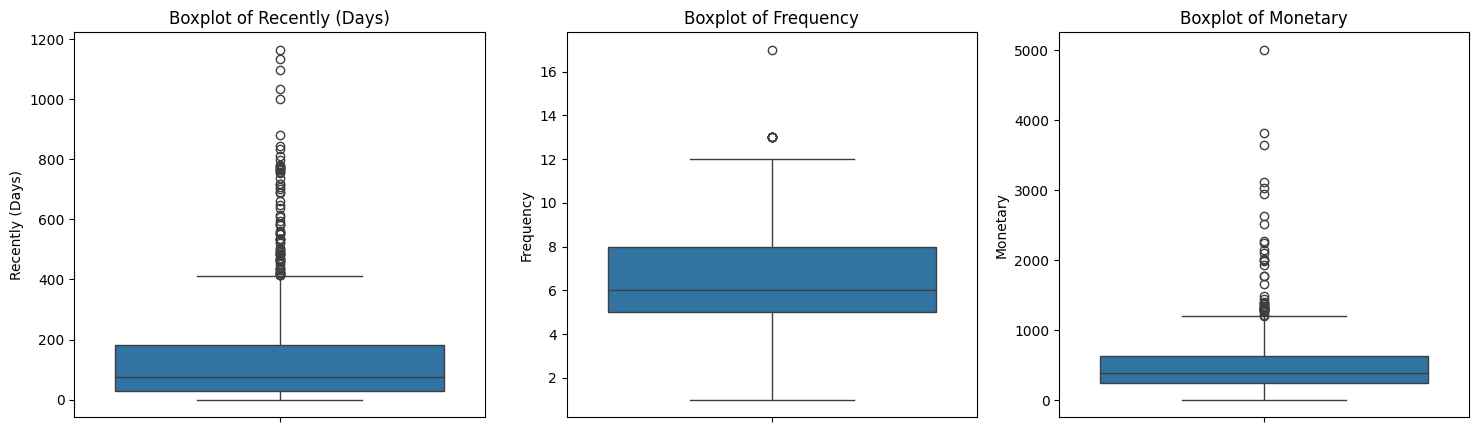

In [ ]:
# คำนวณสถิติเบื้องต้น (mean, median, std)
rfm_stats = df_rfm1.describe()

# คำนวณ skewness และ kurtosis เพิ่ม 2 แถว skew, kurtosis เข้าไปในตาราง
rfm_stats.loc["skew"] = df_rfm1[["Recently (Days)", "Frequency", "Monetary"]].skew() # วัดความเบ้ของข้อมูล (บวก เบ้ขวากว่าปกติ, ลบเบ้ซ้ายกว่าปกติ, ใกล้หรือเท่ากับศูนย์กระจายตัวแทบจะปกติ)
rfm_stats.loc["kurtosis"] = df_rfm1[["Recently (Days)", "Frequency", "Monetary"]].kurtosis() # วัดความแหลมของข้อมูล (บวก แหลมกว่าปกติ, ลบ แบนกว่าปกติ, ใกล้หรือเท่ากับศูนย์กระจายตัวแทบจะปกติ)

styled_note("สรุปค่าสถิติ RFM : ⬇︎")
display(rfm_stats) # แสดงผลเป็นตาราง ใช้เหมือน print แค่ถ้าอยากโชว์เป็น Dataframe ให้ใช้ display

fig1, axes = plt.subplots(1, 3, figsize=(18, 5)) # กำหนดขนาด canvas : width*height = 18*5 | ภายใน canvas มีตำแหน่ง Chart 3 ตำแหน่ง คือ ตำแหน่งที่ 1*1(0), 1*2(1), 1*3(2) เรียงตัวกันเป็นแนวนอน

sns.boxplot(y = df_rfm1["Recently (Days)"], ax=axes[0]) # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Recently (Days) จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*1(0)
axes[0].set_title("Boxplot of Recently (Days)") # กำหนดชื่อ title chart ว่า Boxplot of Recently (Days)

sns.boxplot(y=df_rfm1["Frequency"], ax=axes[1])  # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Frequency จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*2(1)
axes[1].set_title("Boxplot of Frequency")       # กำหนดชื่อ title chart ว่า Boxplot of Frequency

sns.boxplot(y=df_rfm1["Monetary"], ax=axes[2])   # สร้าง boxplot chart โดยใช้ข้อมูลคอลัมน์ Monetary จากตาราง df_rfm1 ที่ตำแหน่ง canvas ชื่อ axes ตำแหน่งที่ 1*3(2)
axes[2].set_title("Boxplot of Monetary")        # กำหนดชื่อ title chart ว่า Boxplot of Monetary

styled_note("แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎")
display(fig1)   # แสดงกราฟ
plt.close(fig1) # ป้องกันการแสดงกราฟซ้อนกันกัน


## **Define evaluation criteria for identifying data distribution patterns**

In [ ]:
# สร้างเกณฑ์ การตัดสินใจว่าควรใช้ quartile หรือ percentile กับชุดข้อมูล 3 ชุดที่ว่า คือ Recently (Days), Frequency,	Monetary

decisions = {} # สร้าง empty dictionary รอการ assign ค่าเพื่อตัดสินว่าควรใช้ quartile หรือ percentile

for col in ["Recently (Days)", "Frequency", "Monetary"]: # สร้าง for loop สำหรับทุกๆ argument ที่อยู่ในลิสต์
    skewness = df_rfm1[col].skew() # เลือกคอลัมน์ในตาราง df_rfm1 ไปคำนวณหาวามเบ้
    if abs(skewness) <= 0.5: # ทดสอบความเบ้ ถ้าความเบ้อยู่ในช่วงตั้งแต่ -0.5 ไม่เกิน 0.5
        decision = "Normal distribution (Quartile is fine)" # แสดงข้อความว่า การจายตัวค่อนข้างปกติ แบ่งโดยช่วงข้อมูลเท่ากันๆตามส่วนที่กำหนด
    elif skewness > 0.5: # ทดสอบความเบ้ ถ้ามากกว่า 0.5
        decision = "Right-skewed (Percentile is better)" # แสดงข้อความว่า กระจายเบ้ขวาแน่นอนให้ใช้การแบ่งข้อมูล ตามการบอกตำแหน่งแบบ percentile
    else:           # ทดสอบความเบ้ ถ้าน้อยกว่า -0.5
        decision = "Left-skewed (Percentile is better)" # แสดงข้อความว่า กระจายเบ้ซ้ายแน่นอนให้ใช้การแบ่งข้อมูล ตามการบอกตำแหน่งแบบ percentile
    decisions[col] = decision # นำข้อความที่ได้ไปใส่ใน value โดย Key เหล่านี้ Recently (Days), Frequency, Monetary

styled_note("ข้อมูลตัดสินใจการแบ่งกลุ่มลูกค้า : ⬇︎", decisions)
display(decisions) # แสดงเป็น dictionary ว่าควรใช้เกณฑ์อันนั้นเป็นการแบ่ง


,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


## **Generating RFM Scores for Customer Segmentation**

In [ ]:
df_rfm2 = df_rfm1.copy() # copy table

def assign_rfm_score(value, percentiles, labels): # สร้างฟังก์ชัน assign_rfm_score รับค่า parameter 3 ค่า สำหรับให้คะแนนตาม percentile
    return labels[np.searchsorted(percentiles, value)] # คืนค่าที่ ค้นหาค่าที่กำหนด ไปเปรียบเทียบกับค่าเรียงลำดับจากน้อยน้อยไปมาก ตามตำแหน่ง percentiles หลังจากนั้นอยู่ที่ percentiles ที่เท่าไรก็คืนตาม labels ที่กำหนดกลับมา

# คำนวณ percentile สำหรับแต่ละตัวแปร
recently_percentiles = np.percentile(df_rfm2["Recently (Days)"], [20, 40, 60, 80]) # คำนวณหา percentile ที่ 20, 40, 60, 80 ตามลำดับในคอลัมน์ Recently (Days) และเก็บค่าไว้ในตัวแปร recently_percentiles
monetary_percentiles = np.percentile(df_rfm2["Monetary"], [20, 40, 60, 80]) # คำนวณหา percentile ที่ 20, 40, 60, 80 ตามลำดับในคอลัมน์ Monetary และเก็บค่าไว้ในตัวแปร monetary_percentiles

# ให้คะแนน RFM ตาม percentile สำหรับ RM เเต่ F จะใช้การแบ่งส่วนเท่าๆกัน
df_rfm2["R_Score"] = df_rfm2["Recently (Days)" # สร้างคอลัมน์ R_Score เก็บค่า Score จากคอลัมน์ Recently (Days)
                            ].apply(lambda x: assign_rfm_score(x, recently_percentiles, [5, 4, 3, 2, 1])) # โดยที่เรียกใช้ค่าแต่ละเเถวใน Recently (Days) โดยค่าแต่ละค่านำไป ค้นหาเปรียบเทียบกับค่าใน recently_percentiles ที่สร้างก่อนหน้าแล้วให้ 5 เมื่อพึ่งเปิดบิล และ 1 เมื่อไม่ได้เปิดบิลนานแล้ว

df_rfm2["F_Score"] = pd.qcut(df_rfm2["Frequency"], q=5, labels=[1, 2, 3, 4, 5]) # สร้างคอลัมน์ F_Score แบ่งข้อมูลเป็น 5 แต่ละส่วนมีจำนวนข้อมูลเท่าๆกัน โดยที่ซื้อบ่อยมากให้ 5 ซื้อไม่บ่อยให้ 1

df_rfm2["M_Score"] = df_rfm2["Monetary" # สร้างคอลัมน์ M_Score เก็บค่า Score จากคอลัมน์ Monetary
                            ].apply(lambda x: assign_rfm_score(x, monetary_percentiles, [1, 2, 3, 4, 5])) # โดยที่เรียกใช้ค่าแต่ละเเถวใน Monetary โดยค่าแต่ละค่านำไป ค้นหาเปรียบเทียบกับค่าใน recently_percentiles ที่สร้างก่อนหน้าแล้วให้ 5 เมื่อยอดซื้อต่อเดือนสูง และ 1 เมื่อยอดซื้อต่อเดือนต่ำ

df_rfm2["F_Score"] = df_rfm2["F_Score"].astype(int) # แปลง F_Score จาก category เป็น int

df_rfm2["Y_(F+M)/2"] = (df_rfm2["F_Score"] + df_rfm2["M_Score"]) / 2 # สร้างคอลัมน์ใหม่โดยการเอาคอลัมน์ F_Score กับ M_Score มาหารสองเพื่อแตรียมกำหนดเป็นแกนตั้ง

styled_note("เพิ่ม RFM-Score Columns : ⬇︎", df_rfm2)
display(df_rfm2) # แสดงผล


NameError: name 'df_rfm2' is not defined

## **Creating the Customer Segment Column Based on RFM Score (RFM Table Final)**

In [ ]:
df_rfm3 = df_rfm2.copy() # reuse Table

def classify_rfm(row): # สร้างฟังก์ชันเพื่อจำแนกดูว่า 2 ต้องมี range ที่เท่าไรถึงจะได้อยู่ใน กลุ่มลูกค้าที่เหมาะสม
    r, y = row["R_Score"], row["Y_(F+M)/2"] # กำหนดค่าในคอลัมน์ R_Score และ Y_(F+M)/2 ในตัวแปร r และ y เป็นหลัก

    if r >= 5 and y >= 4:  # ถ้า R_Score มีค่าตั้งแต่ 5 ขึ้นไป และ y มีค่าตั้งแต่ 4 ขึ้นไป
        return "Champions"  # ให้คืนค่า Champions
    elif r >= 3 and y >= 4:  # ถ้า R_Score มีค่าตั้งแต่ 3 ขึ้นไป และ y มีค่าตั้งแต่ 4 ขึ้นไป
        return "Loyal Customers"  # ให้คืนค่า Loyal Customers
    elif r >= 4 and 2 <= y < 4:  # ถ้า R_Score มีค่าตั้งแต่ 4 ขึ้นไป และ y มีค่าตั้งแต่ 2 ไม่ถึง 4
        return "Potential Loyalists"  # ให้คืนค่า Potential Loyalists
    elif r >= 5 and 0 <= y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 5 ขึ้นไป และ y มีค่าตั้งแต่ 0 ไม่ถึง 2
        return "New Customers"  # ให้คืนค่า New Customers
    elif 4 <= r < 5 and y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 4 ไม่ถึง 5 และ y น้อยกว่า 2
        return "Promising"  # ให้คืนค่า Promising
    elif 3 <= r < 4 and 0 <= y < 3:  # ถ้า R_Score มีค่าตั้งแต่ 3 ไม่ถึง 4 และ y น้อยกว่า 3
        return "About to Sleep"  # ให้คืนค่า About to Sleep
    elif 3 <= r < 4 and 3 <= y < 4:  # ถ้า R_Score มีค่าตั้งแต่ 3 ไม่ถึง 4 และ y มีค่าตั้งแต่ 3 ไม่ถึง 4
        return "Need Attention"  # ให้คืนค่า Need Attention
    elif 1 <= r < 3 and y >= 5:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 5 ขึ้นไป
        return "Can't Lose Them"  # ให้คืนค่า Can't Lose Them
    elif 1 <= r < 3 and 3 <= y < 5:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้ง 3 ไม่ถึง 5
        return "At Risk"  # ให้คืนค่า At Risk
    elif 1 <= r < 3 and 2 <= y < 3:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 2 ไม่ถึง 3
        return "Hibernating"  # ให้คืนค่า Hibernating
    elif 1 <= r < 3 and 0 <= y < 2:  # ถ้า R_Score มีค่าตั้งแต่ 1 ไม่ถึง 3 และ y มีค่าตั้งแต่ 0 ไม่ถึง 2
        return "Lost"  # ให้คืนค่า Lost

    else:  # กรณีที่ไม่เข้าเงื่อนไขใด ๆ
        return "Other"  # ให้คืนค่า Other

# เพิ่มคอลัมน์ Segment ใน DataFrame
df_rfm3["Segment"] = df_rfm3.apply(classify_rfm, axis=1) # สร้างคอลัมน์ เรียกใช้ฟังก์ชัน classify_rfm โดยเอาค่า 2 คอลัมน์ที่อยู่ใน classify_rfm ที่ถูกแยกเงื่อนไขทีละแถวและตั้งชื่อว่า Segment

 # สร้างคอลัมน์บ่งบอกว่า segment ไหนที่มี Impact ต่อธุรกิจมากที่สุด
df_rfm3["Business_Impact"] = np.where(df_rfm3["Segment"] == "Champions", 5, # Champions ระดับ 5
                  np.where(df_rfm3["Segment"] == "Loyal Customers", 5, # Loyal Customers ระดับ 5
                  np.where(df_rfm3["Segment"] == "Can't Lose Them", 4, # Can't Lose Them ระดับ 4
                  np.where(df_rfm3["Segment"] == "Potential Loyalists", 4, # Potential Loyalists ระดับ 4
                  np.where(df_rfm3["Segment"] == "New Customers", 3, # New Customers ระดับ 3
                  np.where(df_rfm3["Segment"] == "Promising", 3, # Promising ระดับ 3
                  np.where(df_rfm3["Segment"] == "Need Attention", 2, # Need Attention ระดับ 2
                  np.where(df_rfm3["Segment"] == "About to Sleep", 2, # About to Sleep ระดับ 2
                  np.where(df_rfm3["Segment"] == "At Risk", 2, # At Risk ระดับ 2
                  np.where(df_rfm3["Segment"] == "Hibernating", 1, # Hibernating ระดับ 1
                  np.where(df_rfm3["Segment"] == "Lost", 1, 0))))))))))) # Lost ระดับ 1

styled_note("RFM Table Final : ⬇︎", df_rfm3)
display(df_rfm3) # ข้อมูลที่พร้อมนำไปสรุปผลต่อ


'ตาราง RFM Final : ⬇︎'

,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


## **Exporting Customer Segments (RFM) to CSV Format**

In [ ]:
df_rfm3.to_csv("data_rfm.csv") # ส่งออกข้อมูล (ให้ดาวน์โหลดไฟล์ตรงโฟลเดอร์ใน Colab ที่อยู่ตอนโหลด Data เข้ามาเพื่อโหลดเข้าคอมพิวเตอร์)


## **Customer Count and Business Impact by Segment**

In [ ]:
# ตั้งชื่อตาราง segment_n นับจำนวนลูกค้าจัดกลุ่มตาม Segment เรียงค่ามากไปค่าน้อย ทำเป็นตาราง จัดเรียงลำดับใหม่
segment_n = df_rfm3.groupby("Segment")["Customer Name"
                      ].count(
                      ).sort_values(ascending = False
                      ).reset_index()

segment_n.columns = ["Segment", "No. Customers"] # เปลี่ยนชื่อคอลัมน์ จาก count เป็น No. Customers

# แสดงตารางสรุปจำนวนลูกค้า ตาม Segment
styled_note("Customer Count. by Segment : ⬇︎")
display(segment_n)

# แสดงตารางระดับคะแนน Segment ยิ่งสูง ยิ่งส่งผลต่อธุรกิจ จัดเรียงลำดับหใม่
styled_note("Level Segment : ⬇︎")
display(df_rfm3[["Segment", "Business_Impact"]
               ].drop_duplicates(
               ).sort_values("Business_Impact", ascending = False
               ).reset_index())


,Segment,No. Customers
0,Potential Loyalists,178
1,At Risk,141
2,Hibernating,91
3,Loyal Customers,86
4,Lost,73
5,Need Attention,63
6,About to Sleep,60
7,Champions,53
8,New Customers,22
9,Promising,15


,index,Segment,Business_Impact
0,3,Loyal Customers,5
1,13,Champions,5
2,1,Potential Loyalists,4
3,45,Can't Lose Them,4
4,8,Promising,3
5,33,New Customers,3
6,2,Need Attention,2
7,16,At Risk,2
8,7,About to Sleep,2
9,0,Lost,1


## **Viz-The RFM Model Chart Pattern with the Highest Business Impact**

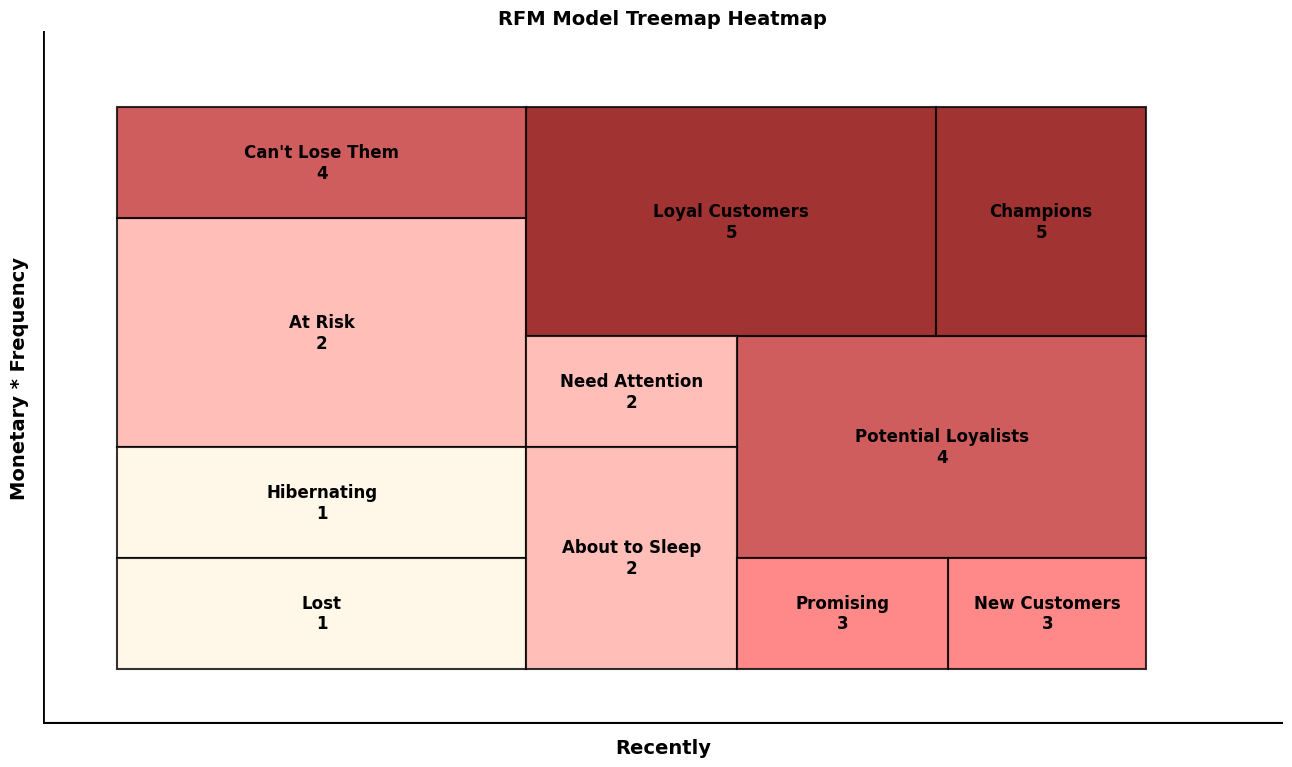

In [ ]:
segment_n1 = segment_n.copy() # reuse table

# 📍 Note : ถ้าลำดับการเรียง Segment เปลี่ยนไป ใน segment_n -> ต้องลบ `📍del layout_positions📍` ก่อน เพราะ dict ไม่สามารถเปลี่ยนแปลง key ได้
# update ค่าคอลัมน์ No. Customers ตามเงื่อนไข
segment_n1["No. Customers"] = np.where(segment_n1["Segment"] == "Champions", 5,
                  np.where(segment_n1["Segment"] == "Loyal Customers", 5,
                  np.where(segment_n1["Segment"] == "Can't Lose Them", 4,
                  np.where(segment_n1["Segment"] == "Potential Loyalists", 4,
                  np.where(segment_n1["Segment"] == "New Customers", 3,
                  np.where(segment_n1["Segment"] == "Promising", 3,
                  np.where(segment_n1["Segment"] == "Need Attention", 2,
                  np.where(segment_n1["Segment"] == "About to Sleep", 2,
                  np.where(segment_n1["Segment"] == "At Risk", 2,
                  np.where(segment_n1["Segment"] == "Hibernating", 1,
                  np.where(segment_n1["Segment"] == "Lost", 1, 0)))))))))))

# ตั้งค่าขนาดของ Layout (📍 Note : ต้องยึดโยงลำดับตาม segment_n1 ถ้าบางกลุ่มมีการเปลี่ยนแปลงลำดับ layout จะมั่วทันที)
layout_positions = {
    "Potential Loyalists": (0.50, 0.16, 0.33, 0.32),
    "At Risk": (0.00, 0.32, 0.33, 0.33),
    "Hibernating": (0.00, 0.16, 0.33, 0.16),
    "Loyal Customers": (0.33, 0.48, 0.33, 0.33),
    "Lost": (0.00, 0.00, 0.33, 0.16),
    "Need Attention": (0.33, 0.32, 0.17, 0.16),
    "About to Sleep": (0.33, 0.00, 0.17, 0.32),
    "Champions": (0.66, 0.48, 0.17, 0.33),
    "New Customers": (0.67, 0.00, 0.16, 0.16),
    "Promising": (0.50, 0.00, 0.17, 0.16),
    "Can't Lose Them": (0.00, 0.65, 0.33, 0.16),
}

# 2️⃣ สมมติว่ามี DataFrame segment_n1 ที่อาจถูกเรียงลำดับใหม่
# (ตรวจสอบก่อนว่าคอลัมน์ Segment อยู่ใน segment_n1)
if "Segment" in segment_n1.columns:
    # 3️⃣ จัดเรียง layout_positions ให้ตรงกับลำดับใน segment_n1
    layout_positions = {
        segment: layout_positions[segment] for segment in segment_n1["Segment"]
    }
else:
    raise KeyError("คอลัมน์ 'Segment' ไม่พบใน segment_n1")

# 4️⃣ ตอนนี้ layout_positions คือ dictionary ที่เรียงตาม segment_n1 แล้ว ✅

# กำหนดสีไล่ระดับตามจำนวนลูกค้า
salmon_cmap = LinearSegmentedColormap.from_list("salmon_cmap",
  ["#FFF5E1", "#FF6B6B", "#8B0000"])
norm = plt.Normalize(segment_n1["No. Customers"].min(), segment_n1["No. Customers"].max())
colors = salmon_cmap(norm(segment_n1["No. Customers"]))

# วาดแผนภาพ Layout พร้อมเพิ่มเส้นแกน x และ y
fig2, ax = plt.subplots(figsize=(16, 9))

adjusted_layout_positions = {
    key: (x + 0.06, y + 0.08, w, h)  # ลดขนาดและเลื่อนให้พอดี
    for key, (x, y, w, h) in layout_positions.items()
}

for (segment, (x, y, w, h)), color, count in zip(adjusted_layout_positions.items(), colors, segment_n1["No. Customers"]):
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor="black", facecolor=color, alpha=0.8)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, f"{segment}\n{count}", ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# เพิ่มเส้นแกน x และ y
ax.axhline(y=0, color="black", linewidth=3.0)  # เส้นแกน x
ax.axvline(x=0, color="black", linewidth=2.0)  # เส้นแกน y

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Recently", fontsize=14, fontweight="bold", labelpad=10)
ax.set_ylabel("Monetary * Frequency", fontsize=14, fontweight="bold", labelpad=10)
ax.set_frame_on(False)

# ปรับตำแหน่ง Title ให้ชิด Chart มากขึ้น
plt.title("RFM Model Treemap Heatmap", fontsize=14, fontweight="bold", pad=5)

# แสดงแผนภาพ
styled_note("ในอุดมคิติ เราต้องการให้ Chart มีลักษณะแบบนี้มากที่สุด โดยพิจารณาจาก Revenue Oppurtunity & Retention Oppurtunity : ⬇︎")
display(fig2)
plt.close(fig2)


## **Viz-The RFM Model Chart Pattern Based on Our Data**


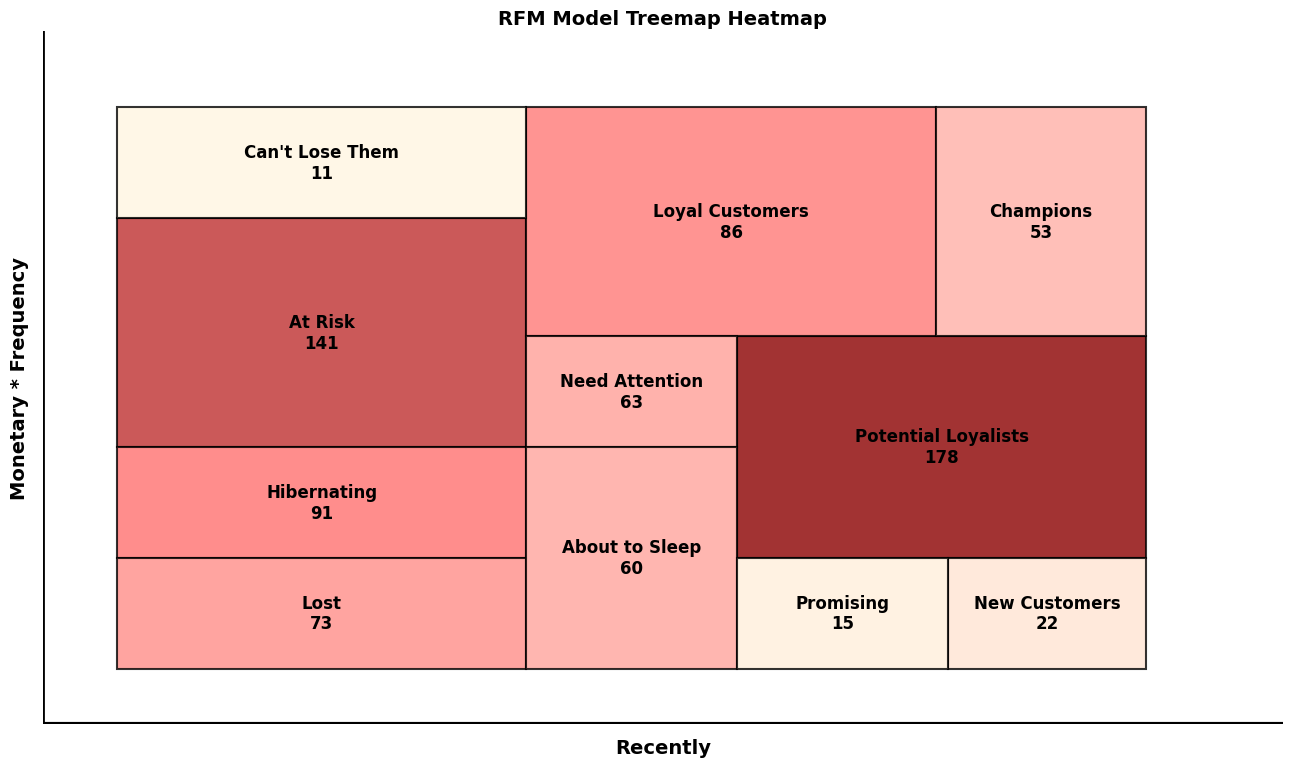

In [ ]:
# ตั้งค่าขนาดของ Layout (📍 Note : ต้องยึดโยงลำดับตาม segment_n ถ้าบางกลุ่มมีการเปลี่ยนแปลงลำดับ layout จะมั่วทันที)
layout_positions = {
    "Potential Loyalists": (0.50, 0.16, 0.33, 0.32),
    "At Risk": (0.00, 0.32, 0.33, 0.33),
    "Hibernating": (0.00, 0.16, 0.33, 0.16),
    "Loyal Customers": (0.33, 0.48, 0.33, 0.33),
    "Lost": (0.00, 0.00, 0.33, 0.16),
    "Need Attention": (0.33, 0.32, 0.17, 0.16),
    "About to Sleep": (0.33, 0.00, 0.17, 0.32),
    "Champions": (0.66, 0.48, 0.17, 0.33),
    "New Customers": (0.67, 0.00, 0.16, 0.16),
    "Promising": (0.50, 0.00, 0.17, 0.16),
    "Can't Lose Them": (0.00, 0.65, 0.33, 0.16),
}

# 2️⃣ สมมติว่ามี DataFrame segment_n ที่อาจถูกเรียงลำดับใหม่
# (ตรวจสอบก่อนว่าคอลัมน์ Segment อยู่ใน segment_n)
if "Segment" in segment_n.columns:
    # 3️⃣ จัดเรียง layout_positions ให้ตรงกับลำดับใน segment_n
    layout_positions = {
        segment: layout_positions[segment] for segment in segment_n["Segment"]
    }
else:
    raise KeyError("คอลัมน์ 'Segment' ไม่พบใน segment_n")

# 4️⃣ ตอนนี้ layout_positions คือ dictionary ที่เรียงตาม segment_n แล้ว ✅

# กำหนดสีไล่ระดับตามจำนวนลูกค้า
salmon_cmap = LinearSegmentedColormap.from_list("salmon_cmap",
  ["#FFF5E1", "#FF6B6B", "#8B0000"])
norm = plt.Normalize(segment_n["No. Customers"].min(), segment_n["No. Customers"].max())
colors = salmon_cmap(norm(segment_n["No. Customers"]))

# วาดแผนภาพ Layout พร้อมเพิ่มเส้นแกน x และ y
fig3, ax = plt.subplots(figsize=(16, 9))

adjusted_layout_positions = {
    key: (x + 0.06, y + 0.08, w, h)  # ลดขนาดและเลื่อนให้พอดี
    for key, (x, y, w, h) in layout_positions.items()
}

for (segment, (x, y, w, h)), color, count in zip(adjusted_layout_positions.items(), colors, segment_n["No. Customers"]):
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor="black", facecolor=color, alpha=0.8)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, f"{segment}\n{count}", ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# เพิ่มเส้นแกน x และ y
ax.axhline(y=0, color="black", linewidth=3.0)  # เส้นแกน x
ax.axvline(x=0, color="black", linewidth=2.0)  # เส้นแกน y

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Recently", fontsize=14, fontweight="bold", labelpad=10)
ax.set_ylabel("Monetary * Frequency", fontsize=14, fontweight="bold", labelpad=10)
ax.set_frame_on(False)

# ปรับตำแหน่ง Title ให้ชิด Chart มากขึ้น
plt.title("RFM Model Treemap Heatmap", fontsize=14, fontweight="bold", pad=5)

# แสดงแผนภาพ
styled_note("จำนวนลูกค้าแต่ละ Segment : ⬇︎")
display(fig3)
plt.close(fig3)

## **Summary RFM Python**

'ตารางดูพฤติกรรมลูกค้า : ⬇︎'

,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


'สรุปค่าสถิติ rfm : ⬇︎'

,Recently (Days),Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.916772,6.316520,497.350529
std,186.393206,2.550885,456.307968
min,0.000000,1.000000,2.416500
25%,30.000000,5.000000,234.079143
50%,75.000000,6.000000,387.090286
75%,183.000000,8.000000,620.122400
max,1165.000000,17.000000,5008.610000
skew,2.272914,0.362409,3.670047
kurtosis,5.795721,-0.025969,22.645064


'แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎'

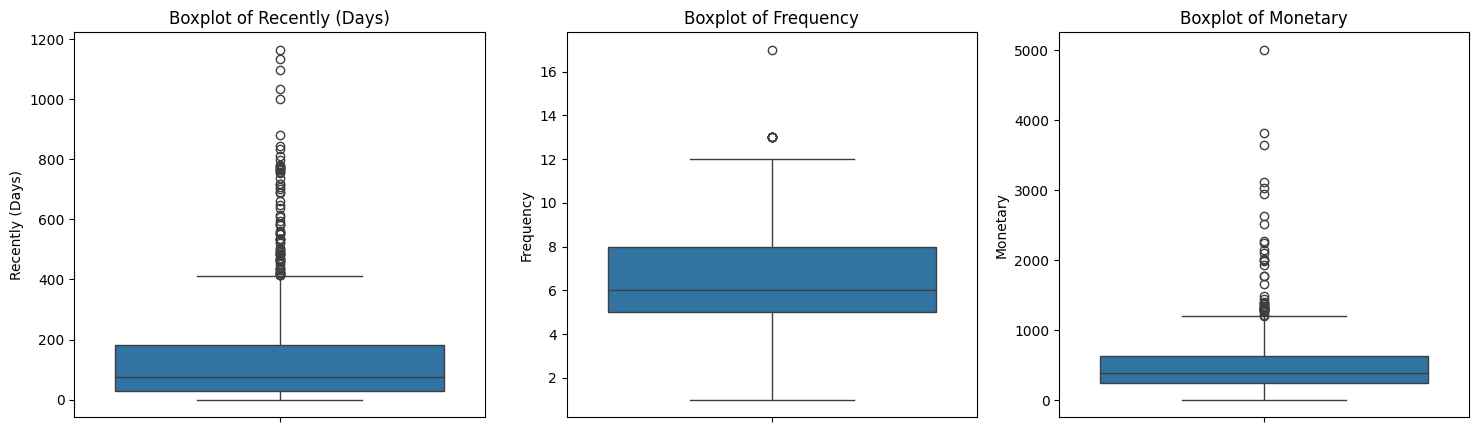

'ข้อมูลตัดสินใจการแบ่งกลุ่มลูกค้า : ⬇︎'

{'Recently (Days)': 'Right-skewed (Percentile is better)',
 'Frequency': 'Normal distribution (Quartile is fine)',
 'Monetary': 'Right-skewed (Percentile is better)'}

'เพิ่ม RFM-Score Columns : ⬇︎'

,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


'ตาราง RFM Final : ⬇︎'

,Customer Name,Recently (Days),Frequency,Monetary,R_Score,F_Score,M_Score,Y_(F+M)/2,Segment,Business_Impact
0,Aaron Bergman,416,3,295.385333,1,1,2,1.5,Lost,1
1,Aaron Hawkins,12,7,249.242857,5,3,2,2.5,Potential Loyalists,4
2,Aaron Smayling,88,7,435.813143,3,3,3,3.0,Need Attention,2
3,Adam Bellavance,54,8,1107.945714,3,4,5,4.5,Loyal Customers,5
4,Adam Hart,34,10,325.033700,4,5,3,4.0,Loyal Customers,5
...,...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,296.832250,4,5,2,3.5,Potential Loyalists,4
789,Yana Sorensen,9,8,840.055500,5,4,5,4.5,Champions,5
790,Yoseph Carroll,4,5,1090.870000,5,2,5,3.5,Potential Loyalists,4
791,Zuschuss Carroll,54,13,891.745222,3,5,5,5.0,Loyal Customers,5


'Customer Count. by Segment : ⬇︎'

,Segment,No. Customers
0,Potential Loyalists,178
1,At Risk,141
2,Hibernating,91
3,Loyal Customers,86
4,Lost,73
5,Need Attention,63
6,About to Sleep,60
7,Champions,53
8,New Customers,22
9,Promising,15


'Level Segment : ⬇︎'

,Segment,Business_Impact
3,Loyal Customers,5
13,Champions,5
1,Potential Loyalists,4
45,Can't Lose Them,4
8,Promising,3
33,New Customers,3
2,Need Attention,2
16,At Risk,2
7,About to Sleep,2
0,Lost,1


'ในอุดมคิติ เราต้องการให้ Chart มีลักษณะแบบนี้มากที่สุด โดยพิจารณาจาก Revenue Oppurtunity & Retention Oppurtunity : ⬇︎'

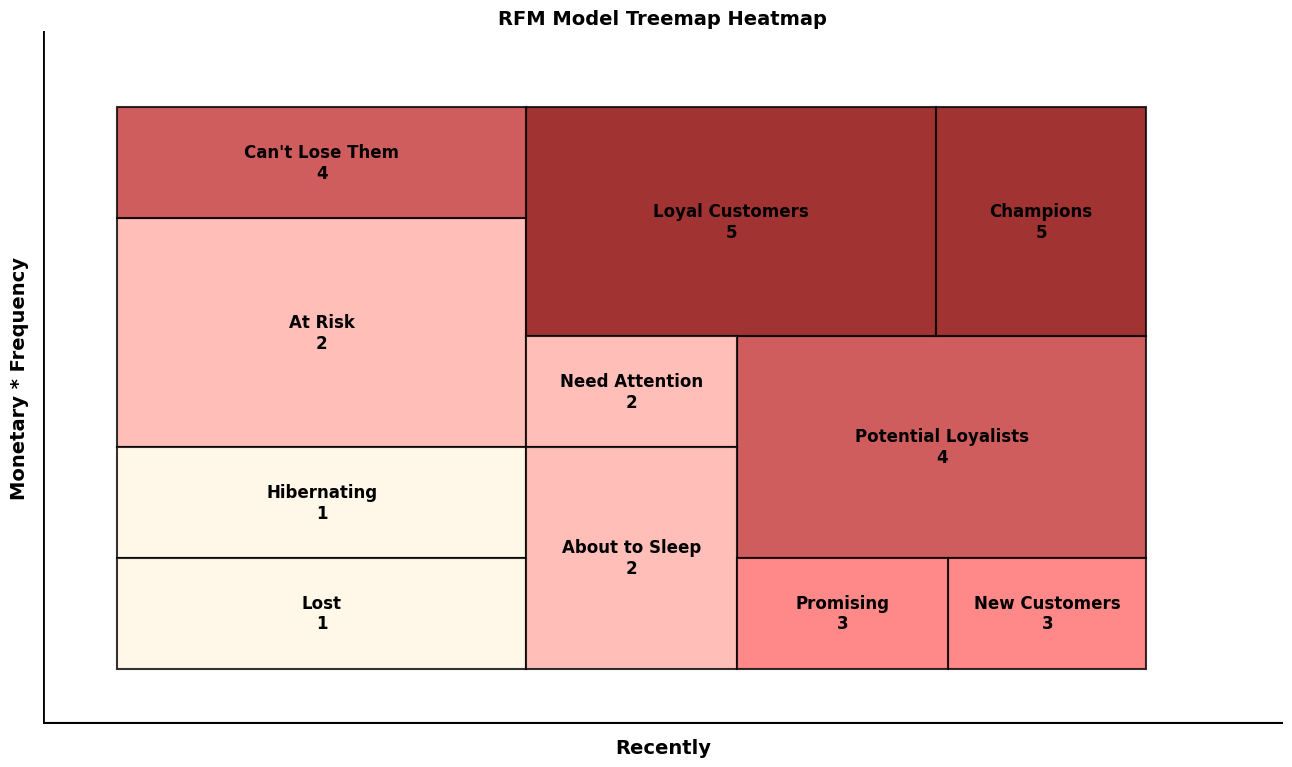

'จำนวนลูกค้าแต่ละ Segment : ⬇︎'

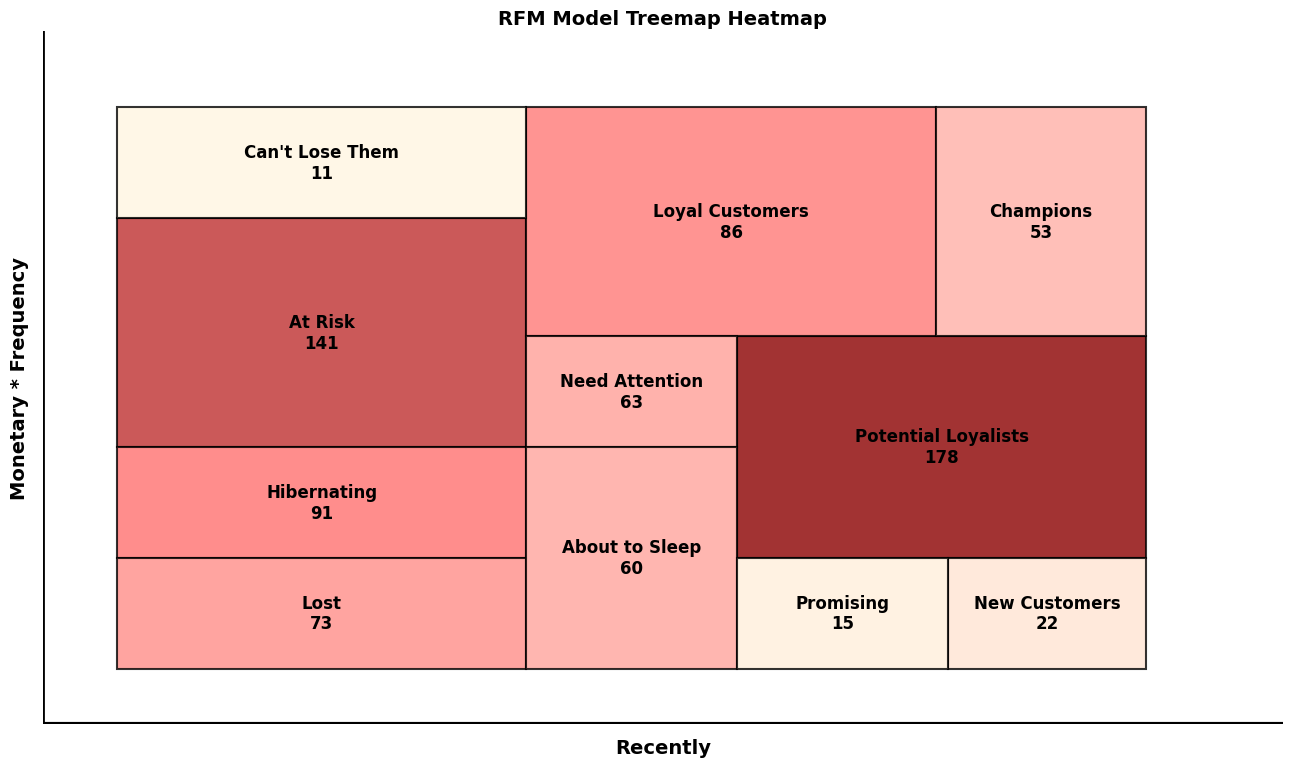

In [ ]:
# Calculate/Manage Data
styled_note("ตารางดูพฤติกรรมลูกค้า : ⬇︎")
display(df_rfm1)

styled_note("สรุปค่าสถิติ RFM : ⬇︎")
display(rfm_stats)

styled_note("แสดงกราฟ Boxplot ทั้ง 3 แท่ง : ⬇︎")
display(fig1)
plt.close(fig1)

styled_note("ข้อมูลตัดสินใจการแบ่งกลุ่มลูกค้า : ⬇︎", decisions)
display(decisions)

styled_note("เพิ่ม RFM-Score Columns : ⬇︎", df_rfm2)
display(df_rfm2)

styled_note("RFM Table Final : ⬇︎", df_rfm3)
display(df_rfm3)

# Summarise Data
styled_note("Customer Count. by Segment : ⬇︎")
display(segment_n)

styled_note("Level Segment : ⬇︎")
display(df_rfm3[["Segment", "Business_Impact"]
               ].drop_duplicates(
               ).sort_values("Business_Impact", ascending = False
               ).reset_index())

# Visualize Data
styled_note("ในอุดมคิติ เราต้องการให้ Chart มีลักษณะแบบนี้มากที่สุด โดยพิจารณาจาก Revenue Oppurtunity & Retention Oppurtunity : ⬇︎")
display(fig2)
plt.close(fig2)

styled_note("จำนวนลูกค้าแต่ละ Segment : ⬇︎")
display(fig3)
plt.close(fig3)


# **Exploratory Sales & Customer Analysis (2017–2020)**

## **Export Customer Data in California (CSV Format)**

## **Export Order Data (CSV): Customers in California and Texas, 2017**


## **Sales Analysis 2017: Total, Average, and Standard Deviation by Month, Day, and Order**


## **Highest Profit Segment in 2018**

## **Top 5 States with the Lowest Total Sales (15 April – 31 December 2019)**

## **Sales Proportion (%) in West and Central Regions, 2019**


## **Top 10 Products by Order Volume vs. Total Sales (2019–2020)**

## **Visual Insights: At Least Two Interesting Plots**